In [ ]:
# Install the required libraries
!pip install cython
!pip install matplotlib

# Load Cython extension
%load_ext cython


In [ ]:
%%cython -a
import numpy as np
cimport numpy as np
from libc.stdlib cimport rand
from libc.math cimport exp

cdef int L = 100
cdef double T = 2.0
cdef int num_steps = 1000000
cdef int n1, n2, nn

# Initialize the lattice
cdef int[:, :] lattice = np.ones((L, L), dtype=np.int32)

cdef double energy(int i, int j, int[:, :] lattice):
    cdef int L = lattice.shape[0]
    cdef int left = lattice[i, (j-1)%L]
    cdef int right = lattice[i, (j+1)%L]
    cdef int up = lattice[(i-1)%L, j]
    cdef int down = lattice[(i+1)%L, j]
    return -lattice[i, j] * (left + right + up + down)

cdef double total_energy(int[:, :] lattice):
    cdef double E = 0.0
    cdef int i, j
    for i in range(L):
        for j in range(L):
            E += energy(i, j, lattice)
    return E / 2.0  # To correct for double-counting

cdef double magnetization(int[:, :] lattice):
    return np.sum(lattice)

def monte_carlo_step(double T, int[:, :] lattice):
    cdef int L = lattice.shape[0]
    cdef int i, j
    cdef double dE
    for _ in range(L * L):
        i = rand() % L
        j = rand() % L
        dE = -2 * energy(i, j, lattice)
        if dE < 0 or exp(-dE / T) > np.random.rand():
            lattice[i, j] *= -1

def run_simulation(int num_steps, double T, int[:, :] lattice):
    cdef int step
    cdef double E, M
    cdef list energies = []
    cdef list magnetizations = []

    for step in range(num_steps):
        monte_carlo_step(T, lattice)
        if step % 1000 == 0:
            E = total_energy(lattice)
            M = magnetization(lattice)
            energies.append(E)
            magnetizations.append(M)
    return energies, magnetizations


Content of stderr:
In file included from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/arrayobject.h:5,
                 from /root/.cache/ipython/cython/_cython_magic_102ce38249c699c2a75b58ae81b233bd42f7396b.c:1250:
/usr/local/lib/python3.10/dist-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
   17 | #warning "Using deprecated NumPy API, disable it with " \
      |  ^~~~~~~

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

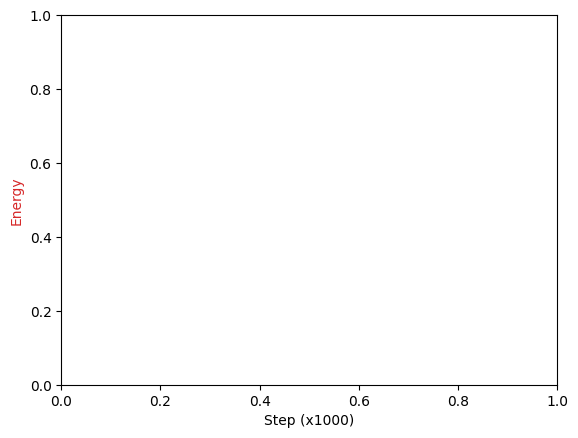

In [ ]:
import matplotlib.pyplot as plt

# Parameters
L = 100  # Lattice size
T = 2.0  # Temperature
num_steps = 1000  # Number of Monte Carlo steps

# Initialize the lattice
lattice = np.ones((L, L), dtype=np.int32)

# Run the simulation
energies, magnetizations = run_simulation(num_steps, T, lattice)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Step (x1000)')
ax1.set_ylabel('Energy', color=color)
ax1.plot(range(0, num_steps, 1), energies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Magnetization', color=color)
ax2.plot(range(0, num_steps, 1), magnetizations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


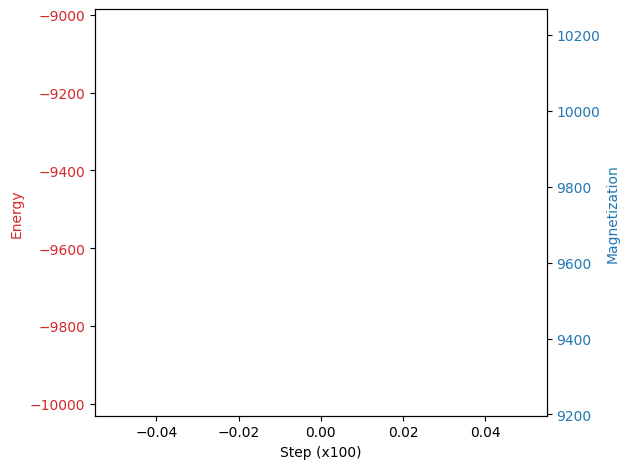

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions for energy and magnetization
def monte_carlo_step(T, lattice):
    L = lattice.shape[0]
    for _ in range(L * L):
        i = np.random.randint(0, L)
        j = np.random.randint(0, L)
        dE = 2 * lattice[i, j] * (
            lattice[(i+1)%L, j] + lattice[i, (j+1)%L] +
            lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
        )
        if dE < 0 or np.random.rand() < np.exp(-dE / T):
            lattice[i, j] *= -1

def total_energy(lattice):
    L = lattice.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            nb = lattice[(i+1)%L, j] + lattice[i, (j+1)%L] + lattice[(i-1)%L, j] + lattice[i, (j-1)%L]
            E += -nb*S
    return E / 4.0

def magnetization(lattice):
    return np.sum(lattice)

def run_simulation(num_steps, T, lattice):
    energies = []
    magnetizations = []
    for step in range(num_steps):
        monte_carlo_step(T, lattice)
        if step % 100 == 0:
            energies.append(total_energy(lattice))
            magnetizations.append(magnetization(lattice))
    return energies, magnetizations

# Parameters
L = 100  # Lattice size
T = 2.0  # Temperature
num_steps = 100  # Number of Monte Carlo steps

# Initialize the lattice
lattice = np.ones((L, L), dtype=np.int32)

# Run the simulation
energies, magnetizations = run_simulation(num_steps, T, lattice)

# Adjust x-axis values to match the data collection interval
x_values = range(0, num_steps, 100)

# Plot the results
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Step (x100)')
ax1.set_ylabel('Energy', color=color)
ax1.plot(x_values, energies, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Magnetization', color=color)
ax2.plot(x_values, magnetizations, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()
